<a href="https://colab.research.google.com/github/rsantistebanr/procesamientoImagenes/blob/main/PROCESAMIENTO_Y_TRAMIENTO_DE_IMG_CON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROCESAMIENTO Y TRATAMIENTO DE IMAGENES:**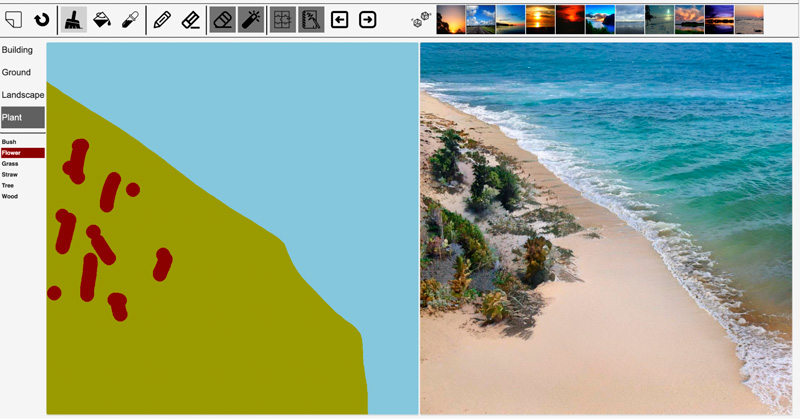

1. Conceptos básicos:
Imagen digital: conjunto de datos numéricos que representan una imagen visual.
Píxeles: unidades básicas de una imagen digital, con valores que representan intensidad de color o brillo.
Canales de color: componentes que definen el color de un píxel, como rojo, verde y azul.
Tipos de imágenes:
Imágenes rasterizadas: compuestas por una matriz de píxeles.
Imágenes vectoriales: definidas por objetos geométricos como líneas, curvas y formas.
Formato de imágenes:
JPEG: formato de compresión con pérdida de información, ideal para imágenes con muchos colores.
PNG: formato de compresión sin pérdida de información, adecuado para imágenes con texto o bordes nítidos.
BMP: formato sin compresión, que conserva toda la información de la imagen original.
2.	 Procesamiento de imágenes:
Adquisición de imágenes:
Cámaras digitales: dispositivos que capturan imágenes a través de un sensor de luz.
Escáneres: dispositivos que convierten imágenes físicas en formato digital.
Preprocesamiento:
Ruido: distorsión aleatoria en la imagen.
Iluminación: ajuste del brillo y contraste de la imagen.
Contraste: diferencia entre las áreas claras y oscuras de la imagen.




In [ ]:
!pip install matplotlib opencv-python watermark

In [ ]:
#importamos librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import YouTubeVideo

In [ ]:
#VARIABLES GLOBALES:
URL_IMG_DRIVE = 'drive/MyDrive/IA/RECURSOS COLAB/'

In [ ]:
urlImgFlor = '{}{}'.format(URL_IMG_DRIVE, "flor.jpg")
imgFlor = cv2.imread( urlImgFlor)
imgFlor
type(imgFlor)

drive/MyDrive/IA/RECURSOS COLAB/flor.jpg


numpy.ndarray

In [ ]:
imgFlor.shape  #nos muestra las dimensiones de la matriz (pixel de alto, pixel de ancho, cada pixel ocupa 3 numeros)

(358, 635, 3)

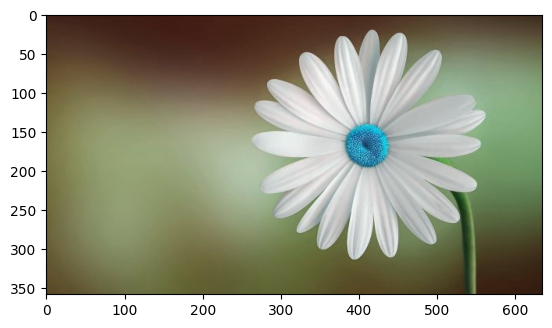

In [ ]:
#mostramos con opencv
plt.imshow(imgFlor)

Espacios de colores

Esto es porque opencv trabaja con las imágenes en el espacio de colores BGR (Blue, Green, Red)

Matplotlib, por su parte, como muchas otras librerías, trabaja en RGB (Red, Green, Blue)

Para pasar de un espacio de colores a otro, usamos cv2.cvtColor()

(358, 635, 3)

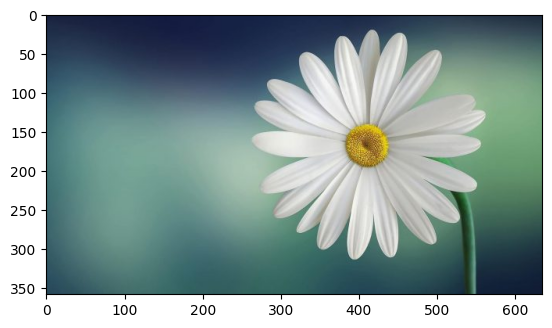

In [ ]:
img_rgb = cv2.cvtColor(imgFlor, cv2.COLOR_BGR2RGB)#por defecto opencv lo pone en bgr
plt.imshow(img_rgb);
img_rgb.shape

Pasar de BGR a escala de grises implica reducir los tres canales de colores a uno solo

(358, 635)

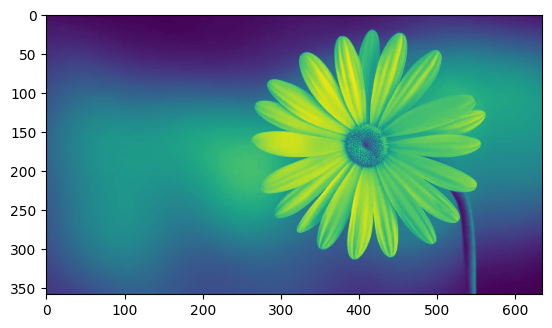

In [ ]:
img_gray = cv2.cvtColor(imgFlor, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray);
img_gray.shape

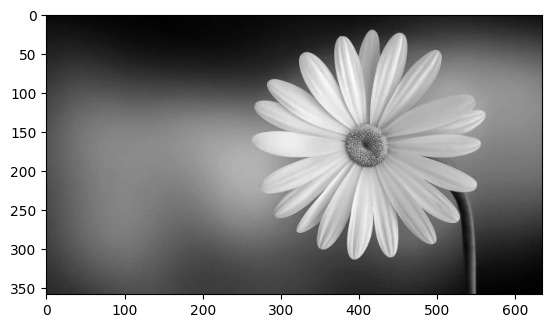

In [ ]:
plt.imshow(img_gray, cmap='gray');

NOTA: Existen otros espacios de colores como el CMYK (Cyan, Magenta, Yellow, Key) utilizado en impresión y el HSV (Hue, Saturation, Value) cuya codificación es a veces mucho más cercana a las intuciones humanas del color

**Métodos de manipulación comunes en Computer Vision**
Filtro gaussiano
El filtro gaussiano **desenfoca o suaviza** la imagen tratada. En inglés se conoce como "blur", "gaussian blur", o "gaussian smoothing".

Es un efecto ampliamente utilizado en procesamiento de imagenes, ya que sirve para **suavizar** los bordes y **eliminar ruido**, aun con el costo evidente de una pérdida de nitidez y de un aumento de indefinición de las formas. En concreto, el filtro mezcla ligeramente los colores de los píxeles vecinos unos con otros, logrando esta perdida de detalle caracteristica del desenfoque.

**El filtrado gaussiano se utiliza comunmente como un paso previo a la detección de bordes**, ya que los algoritmos de detección de bordes son muy sensibles al ruido.

Para utilizar esta técnica, usamos la funcion cv2.**GaussianBlur()**, que recibe como primer parámetro la imagen que queremos desenfocar y, como segundo parametro, una **tupla con dos números que deben ser impares**. A más grande estos números, mayor el nivel de desenfoque.

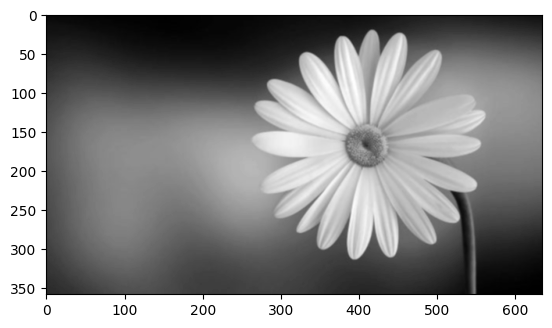

In [ ]:
img_blur = cv2.GaussianBlur(img_gray, (21, 21),0) #La tupla siempre impar
plt.imshow(img_blur, cmap='gray');


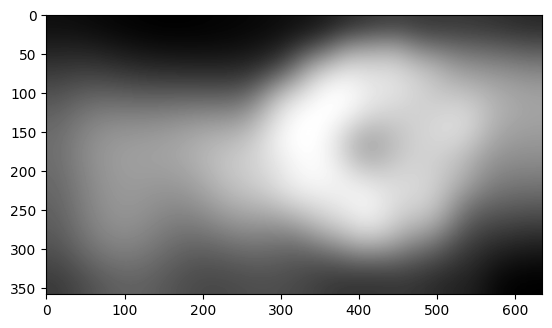

In [ ]:
img_blur = cv2.GaussianBlur(img_gray, (151, 151), 0)
plt.imshow(img_blur, cmap='gray');

**Detección de bordes**

La función de detección de bordes nativa de OpenCV utiliza el Algoritmo de Canny, una conocida técnica** multi-etapa** inventada por John F. Canny en 1986. La primera etapa de e**ste algoritmo es un filtrado gaussiano de tamaño (5, 5) -** no hace falta hacerla previamente porque el proceso la hace automáticamente.

Para usar esta función llamamos a **cv2.Canny()**. El primer parámetro es la imagen en la que queremos detectar los bordes. **El segundo y el tercer parámetro configuran la sensibilidad del algoritmo.** Valores típicos son: (100, 200), (50, 100), (150, 200). **El tercero debe ser más alto que el primero (uno es un mínimo y otro es un máximo).** Valores bajos harán al algoritmo más sensible (esto es, detectará más bordes) y valores más altos harán que detecte menos bordes.

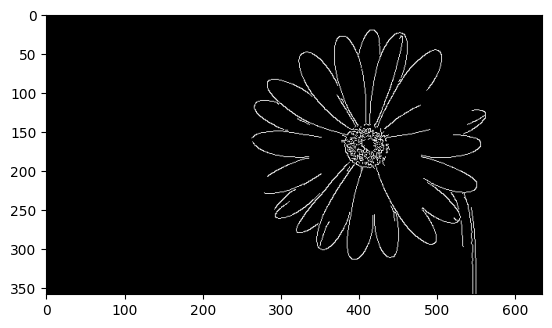

In [ ]:
img_canny1 = cv2.Canny(img_gray, 100, 200)
plt.imshow(img_canny1, cmap='gray');

In [ ]:
img_canny2 = cv2.Canny(img_gray, 10, 20)  #mas bajo = mas bordes
plt.imshow(img_canny2, cmap='gray');

In [ ]:
img_canny3 = cv2.Canny(img_gray, 200, 400)##mas alto menos bordes
plt.imshow(img_canny3, cmap='gray');

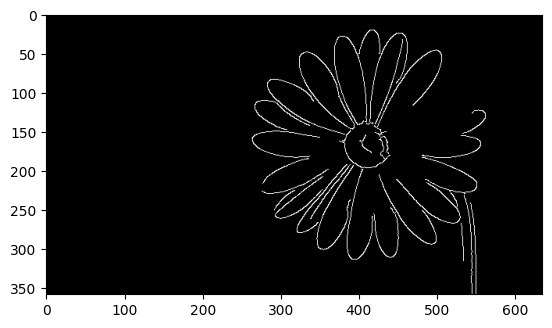

In [ ]:
# Podemos ver que agregando un blureado extra
# podemos ayudar al algoritmo a reducir bordes excesivos (por ejemplo, en la img_canny1 en algunos petalos)
img_extra_blur_canny1 = cv2.Canny(cv2.GaussianBlur(img_gray, (7, 7), 0), 40, 100)#aqui se aplica dos veces el filtro gaussiano, ya
    #que por defecto la cuncion canny le aplica uno automaticamente.
plt.imshow(img_extra_blur_canny1, cmap='gray');

**Opciones de manipulacion de imagenes**

**cv2.resize()**
Para cambiar de tamaño una imagen usamos cv2.resize

**Recortar / croppear**  
Recortar un sector de una imagen es sencillo, considerando que son arrays simplemente los indexamos

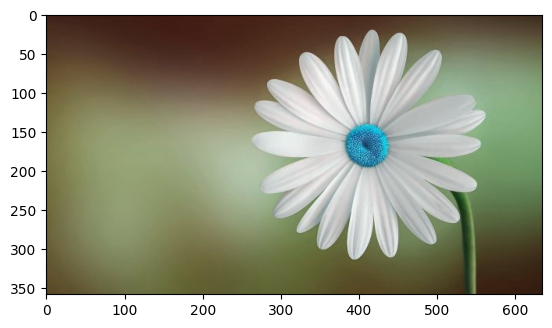

In [ ]:
plt.imshow(imgFlor);

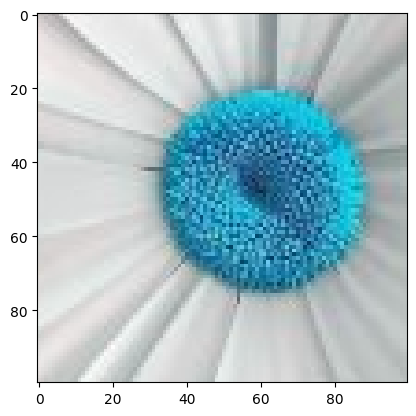

In [ ]:
# Primero ancho y despues alto

#img_resize2 = cv2.resize(imgFlor, (2000, 500))
#plt.imshow(img_resize2);

# Primero alto, despues ancho
img_cropped = imgFlor[120:220, 350:450]
plt.imshow(img_cropped);

**METODOS DE PROCESAMIENTO DE IMAGENES**
1. OPERACIONES ARTIMETICAS:
    Las operaciones aritméticas más sencillas en el procesamiento de imágenes, son las que se realizan a nivel de píxel, gracias a que las imágenes digitales se manejan como matrices de píxeles, separando así a cada píxel para su procesamiento individual.
    Si en caso se desean realizar filtros, entonces se realizar las operaciones imagen a imagen.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


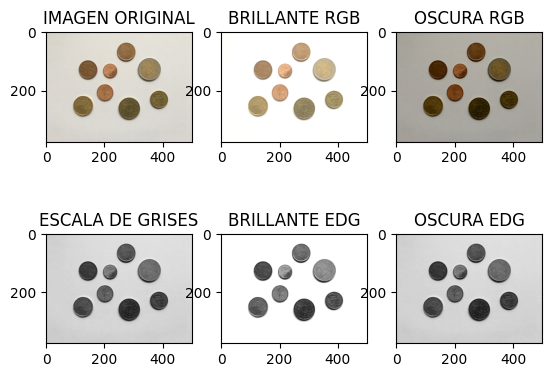

-1

In [ ]:
# Leemos nuestra imagen
urlImgMonedas = '{}{}'.format(URL_IMG_DRIVE, "monedas.jpg")
img = cv2.imread(urlImgMonedas)
imgmat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convertimos a EDG
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Creamos una matriz del tamaño de la IMG
matriz = np.ones(gray.shape, dtype='uint8') * 50
matrizrgb = np.ones(img.shape, dtype='uint8') * 50

# Aumentamos el brillo de la imagen en RGB
brillantergb = cv2.add(img, matrizrgb)
brillantergbm = cv2.cvtColor(brillantergb, cv2.COLOR_BGR2RGB)

# Disminuimos el brillo en RGB
oscurargb = cv2.subtract(img, matrizrgb)
oscurargbm = cv2.cvtColor(oscurargb, cv2.COLOR_BGR2RGB)

# Aumentamos le brillo de la imagen en GRAY
brillantegray = cv2.add(gray, matriz)

# Disminuimos el brillo en GRAY
oscuragray = cv2.subtract(gray, matriz)

# Mostramos Imagenes
fig = plt.figure()
# IMAGEN ORIGINAL
ax1 = fig.add_subplot(2,3,1)
ax1.imshow(imgmat)
ax1.set_title("IMAGEN ORIGINAL")

# BRILLANTE RGB
ax3 = fig.add_subplot(2,3,2)
ax3.imshow(brillantergbm)
ax3.set_title("BRILLANTE RGB")

# OSCURA RGB
ax4 = fig.add_subplot(2,3,3)
ax4.imshow(oscurargbm)
ax4.set_title("OSCURA RGB")

# IMAGEN GRAY
ax2 = fig.add_subplot(2,3,4)
ax2.imshow(gray, cmap="gray")
ax2.set_title("ESCALA DE GRISES")

# BRILLANTE GRAY
ax3 = fig.add_subplot(2,3,5)
ax3.imshow(brillantegray, cmap="gray")
ax3.set_title("BRILLANTE EDG")

# OSCURA GRAY
ax4 = fig.add_subplot(2,3,6)
ax4.imshow(oscuragray, cmap="gray")
ax4.set_title("OSCURA EDG")
plt.show()
cv2.waitKey(0)

2. UMBRALIZACION
La umbralización de imágenes es el proceso por el cual se busca un umbral óptimo que permita distinguir en una imagen los objetos del fondo de los objetos del primer plano. Este umbral es el punto (o valor) en el cual el histograma de una imagen se divide en dos picos.
Es decir binarizamos la imagen, o es 0 o es 255, es decir



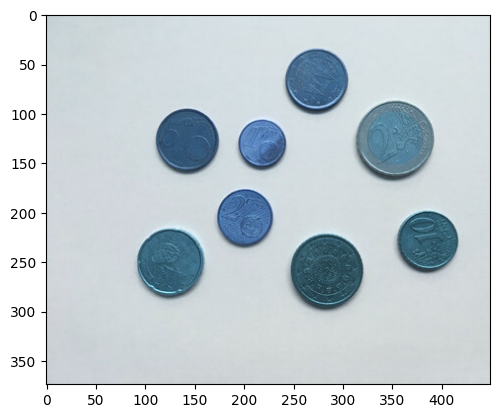

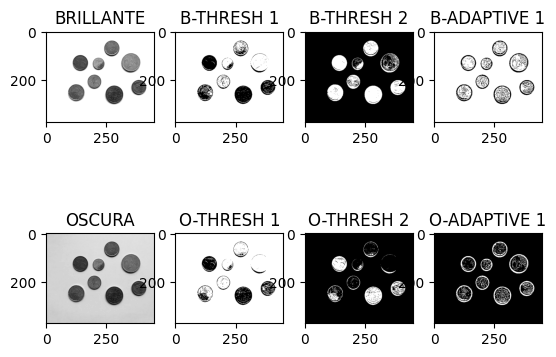

In [ ]:
# Leemos nuestra imagen

urlImgMonedas = '{}{}'.format(URL_IMG_DRIVE, "monedas.jpg")
img = cv2.imread(urlImgMonedas)

# Convertimos a EDG
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Creamos una matriz del tamaño de la IMG
matriz = np.ones(gray.shape, dtype='uint8') * 50

# Aumentamos le brillo de la imagen en GRAY
brillantegray = cv2.add(gray, matriz)

# THRESHOLD
_, imgthresh1 = cv2.threshold(brillantegray, 160, 255, cv2.THRESH_BINARY)

_, imgthresh2 = cv2.threshold(brillantegray, 180, 255, cv2.THRESH_BINARY_INV)

# THRESHOLD ADAPTIVE
imgadaptive1 = cv2.adaptiveThreshold(brillantegray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)


# Disminuimos el brillo en GRAY
oscuragray = cv2.subtract(gray, matriz)

_, imgthresh3 = cv2.threshold(oscuragray, 50, 255, cv2.THRESH_BINARY)

_, imgthresh4 = cv2.threshold(oscuragray, 50, 255, cv2.THRESH_BINARY_INV)

# THRESHOLD ADAPTIVE
imgadaptive2 = cv2.adaptiveThreshold(oscuragray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 7)

# Mostramos Imagenes
fig = plt.figure()
# BRILLANTE
ax1 = fig.add_subplot(2,4,1)
ax1.imshow(brillantegray, cmap="gray")
ax1.set_title("BRILLANTE")

# BRILLANTE THRESH 1
ax3 = fig.add_subplot(2,4,2)
ax3.imshow(imgthresh1, cmap="gray")
ax3.set_title("B-THRESH 1")

# BRILLANTE THRESH 2
ax4 = fig.add_subplot(2,4,3)
ax4.imshow(imgthresh2, cmap="gray")
ax4.set_title("B-THRESH 2") #B-Brillante

# BRILLANTE ADAPTIVE
ax4 = fig.add_subplot(2,4,4)
ax4.imshow(imgadaptive1, cmap="gray")
ax4.set_title("B-ADAPTIVE 1")

# OSCURA
ax2 = fig.add_subplot(2,4,5)
ax2.imshow(oscuragray, cmap="gray")
ax2.set_title("OSCURA")

# OSCURA THRESH 1
ax3 = fig.add_subplot(2,4,6)
ax3.imshow(imgthresh3, cmap="gray")
ax3.set_title("O-THRESH 1")

# OSCURA THRESH 2
ax4 = fig.add_subplot(2,4,7)
ax4.imshow(imgthresh4, cmap="gray")
ax4.set_title("O-THRESH 2")

# OSCURA ADAPTIVE
ax4 = fig.add_subplot(2,4,8)
ax4.imshow(imgadaptive2, cmap="gray")
ax4.set_title("O-ADAPTIVE 1")

plt.show()

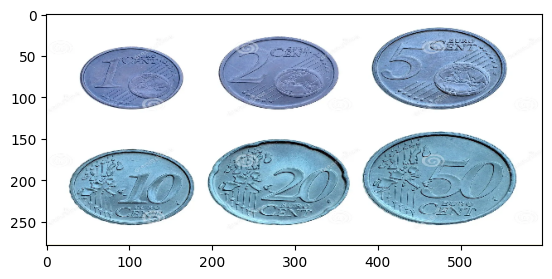

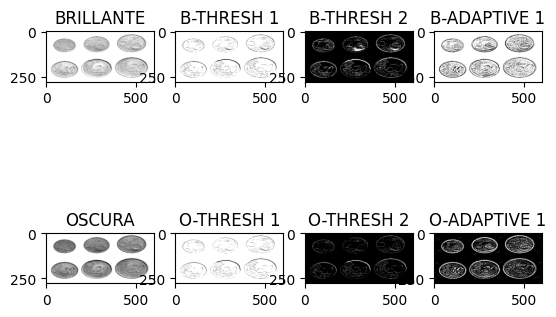

In [ ]:
##REPETIMOS UMBRALIZACION CON UNA SEGUNDA IMAGEN
# Leemos nuestra imagen
urlImgMonedas = '{}{}'.format(URL_IMG_DRIVE, "monedasPrueba2.png")
img = cv2.imread(urlImgMonedas)
img_resize2 = cv2.resize(img, (600, 300))
img_cropped = img_resize2[1:280, 1:600]
plt.imshow(img_cropped);
# Convertimos a EDG
gray = cv2.cvtColor(img_cropped, cv2.COLOR_BGR2GRAY)

# Creamos una matriz del tamaño de la IMG
matriz = np.ones(gray.shape, dtype='uint8') * 50

brillantegray = cv2.add(gray, matriz)
# THRESHOLD
_, imgthresh1 = cv2.threshold(brillantegray, 160, 255, cv2.THRESH_BINARY)
_, imgthresh2 = cv2.threshold(brillantegray, 180, 255, cv2.THRESH_BINARY_INV)

# THRESHOLD ADAPTIVE
imgadaptive1 = cv2.adaptiveThreshold(brillantegray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)


# Disminuimos el brillo en GRAY
oscuragray = cv2.subtract(gray, matriz)

_, imgthresh3 = cv2.threshold(oscuragray, 50, 255, cv2.THRESH_BINARY)

_, imgthresh4 = cv2.threshold(oscuragray, 50, 255, cv2.THRESH_BINARY_INV)

# THRESHOLD ADAPTIVE
imgadaptive2 = cv2.adaptiveThreshold(oscuragray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 7)

# Mostramos Imagenes
fig = plt.figure()
# BRILLANTE
ax1 = fig.add_subplot(2,4,1)
ax1.imshow(brillantegray, cmap="gray")
ax1.set_title("BRILLANTE")

# BRILLANTE THRESH 1
ax3 = fig.add_subplot(2,4,2)
ax3.imshow(imgthresh1, cmap="gray")
ax3.set_title("B-THRESH 1")

# BRILLANTE THRESH 2
ax4 = fig.add_subplot(2,4,3)
ax4.imshow(imgthresh2, cmap="gray")
ax4.set_title("B-THRESH 2") #B-Brillante

# BRILLANTE ADAPTIVE
ax4 = fig.add_subplot(2,4,4)
ax4.imshow(imgadaptive1, cmap="gray")
ax4.set_title("B-ADAPTIVE 1")

# OSCURA
ax2 = fig.add_subplot(2,4,5)
ax2.imshow(oscuragray, cmap="gray")
ax2.set_title("OSCURA")

# OSCURA THRESH 1
ax3 = fig.add_subplot(2,4,6)
ax3.imshow(imgthresh3, cmap="gray")
ax3.set_title("O-THRESH 1")

# OSCURA THRESH 2
ax4 = fig.add_subplot(2,4,7)
ax4.imshow(imgthresh4, cmap="gray")
ax4.set_title("O-THRESH 2")

# OSCURA ADAPTIVE
ax4 = fig.add_subplot(2,4,8)
ax4.imshow(imgadaptive2, cmap="gray")
ax4.set_title("O-ADAPTIVE 1")

plt.show()


3. OPERACIONES BIT A BIT

# **SEGMENTACIÓN DE IMAGENES**
La segmentación de imágenes divide la imagen en sus partes constituyentes
hasta un nivel de subdivisión en el que se aíslen las regiones u objetos de
interés.
Los algoritmos de segmentación se basan en una de estas dos propiedades básicas de los valores del nivel de gris: discontinuidad o similitud entre los
niveles de gris de píxeles vecinos.
**Discontinuidad**. Se divide la imagen basándose en cambios bruscos de nivel de GRIS.
 * Detección de puntos aislados
 * Detección de líneas
 * Detección de bordes

**Similitud**. Se divide la imagen basándose en la búsqueda de zonas que tengan valores similares, conforme a unos criterios prefijados:
  * Crecimiento de región
  * Umbralización


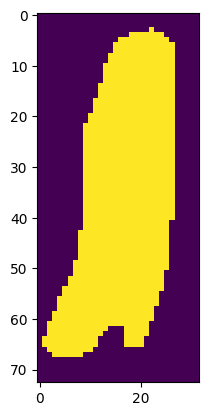

In [ ]:
# Importamos librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
URL_RECURSOS_DRIVE = 'drive/MyDrive/IA/RECURSOS COLAB/'

URL_FROZEN_COCO    = '{}{}'.format(URL_RECURSOS_DRIVE, 'frozen_inference_graph.pb')
URL_MASK_INCEPTION = '{}{}'.format(URL_RECURSOS_DRIVE, 'mask_rcnn_inception_v2_coco_2018_01_28.pbtxt')
# Cargamos el modelo COCO 80 clases
rcnn = cv2.dnn.readNetFromTensorflow(URL_FROZEN_COCO,URL_MASK_INCEPTION  )
# Leemos la imagen
URL_IMG = '{}{}'.format(URL_IMG_DRIVE,'segmentacionImg2.jpeg')
img = cv2.imread(URL_IMG)
alto, ancho, _ =  img.shape
#print(alto, ancho)

# Generamos los colores
colores = np.random.randint(0, 255, (80,3))

# Alistamos nuestra imagen
blob = cv2.dnn.blobFromImage(img, swapRB = True) # Swap: BGR -> RGB

# Procesamos la imagen
rcnn.setInput(blob)

# Extraemos los Rect y Mascaras
info, masks = rcnn.forward(["detection_out_final", "detection_masks"])

# Extraemos la cantidad de objetos detectados
contObject = info.shape[2]
#print(contObject)

# Iteramos sobre los objetos detectados
for i in range(contObject):
    # Extraemos los rectangulos de los objetos
    inf = info[0,0,i]
    #print(inf)

    # Extraemos Clase
    clase = int(inf[1])
    #print(clase)

    # Extraemos puntaje
    puntaje = inf[2]

    # Filtro
    if puntaje < 0.7:
        continue

    # Coordenadas del Rectangulos para deteccion de objetos
    x = int(inf[3] * ancho)
    y = int(inf[4] * alto)
    x2 = int(inf[5] * ancho)
    y2 = int(inf[6] * alto)

    # Extraemos el tamaño de los objetos
    tamobj = img[y:y2, x:x2]
    tamalto, tamancho, _ = tamobj.shape
    #print(tamalto, tamancho)

    # Extraemos Mascara
    mask = masks[i, clase]
    mask = cv2.resize(mask, (tamancho, tamalto))

    # Establecemos un umbral
    _, mask = cv2.threshold(mask, 0.5, 255, cv2.THRESH_BINARY)
    mask = np.array(mask, np.uint8)
    #print(mask.shape)

    # Extraemos coordenadas de la mascara
    contornos, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Elegimos los colores
    color = colores[clase]
    r = int(color[0])
    g = int(color[1])
    b = int(color[2])

    # Iteramos los contornos
    for cont in contornos:
        # Dibujamos mascara
        cv2.fillPoly(tamobj, [cont], (r,g,b))
        # Dibujamos
        cv2.rectangle(img, (x, y), (x2, y2), (r, g, b), 3)

        #print(cont)
    # Mostramos
    #plt.imshow(tamobj)
    # # Mascara
    # cv2.imshow('MASCARA', mask)
    plt.imshow(mask)
    cv2.waitKey(0)



-1

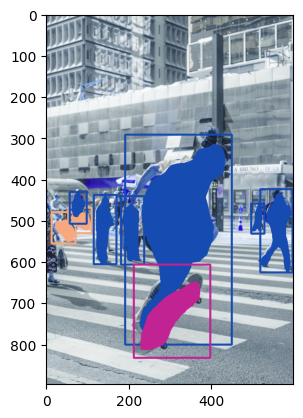

In [ ]:
#cv2.imshow('IMAGEN', img)
plt.imshow(img)
cv2.waitKey(0)